<a href="https://colab.research.google.com/github/deborammartins/Data_Analytics/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alucar - Analisando as vendas

##Importando Bibliotecas

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import datetime
import statsmodels

In [2]:
alucar = pd.read_csv('alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
alucar.shape

(24, 2)

In [5]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [7]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
print(sns.__version__)

0.12.2


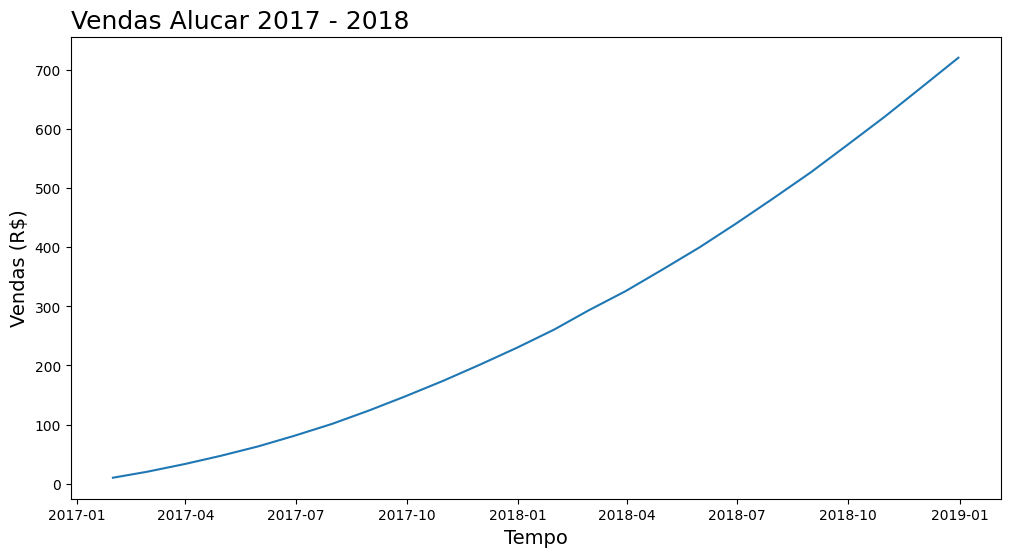

In [9]:
ax = sns.lineplot(x='mes', y='vendas', data = alucar)
sns.set_style('darkgrid') #fundo quadriculado
sns.set_palette('Accent') #muda a cor
ax.set_title(label = 'Vendas Alucar 2017 - 2018', loc = 'left', fontsize=18)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [10]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


## Função Plotar

In [11]:
def plotar(titulo, labelx, labely, x, y, dataset):
  ax = sns.lineplot(x=x, y=y, data = dataset)
  sns.set_style('darkgrid') #fundo quadriculado
  sns.set_palette('Accent') #muda a cor
  ax.set_title(label = titulo, loc = 'left', fontsize=18)
  ax.figure.set_size_inches(10,4)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

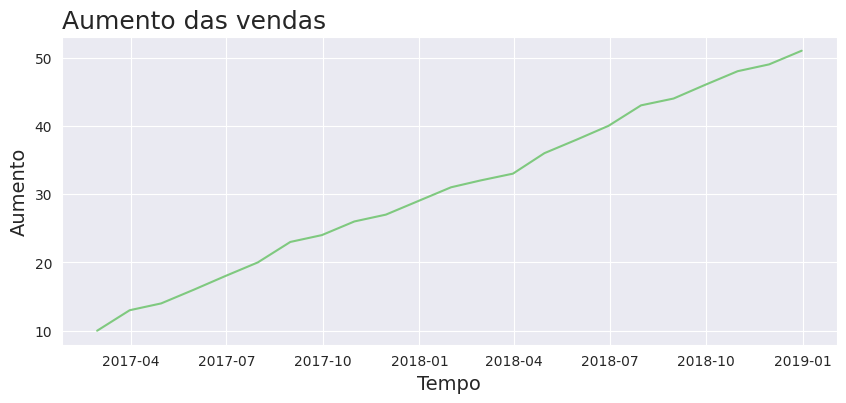

In [12]:
plotar('Aumento das vendas', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [13]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


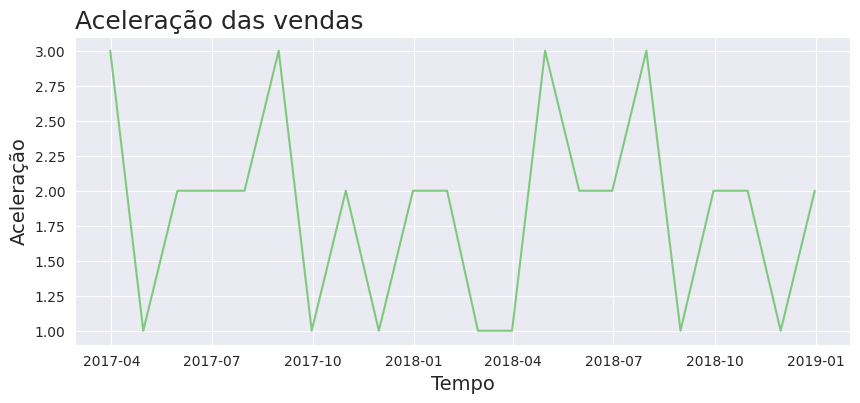

In [14]:
plotar('Aceleração das vendas', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

## Plotando 3 gráficos juntos

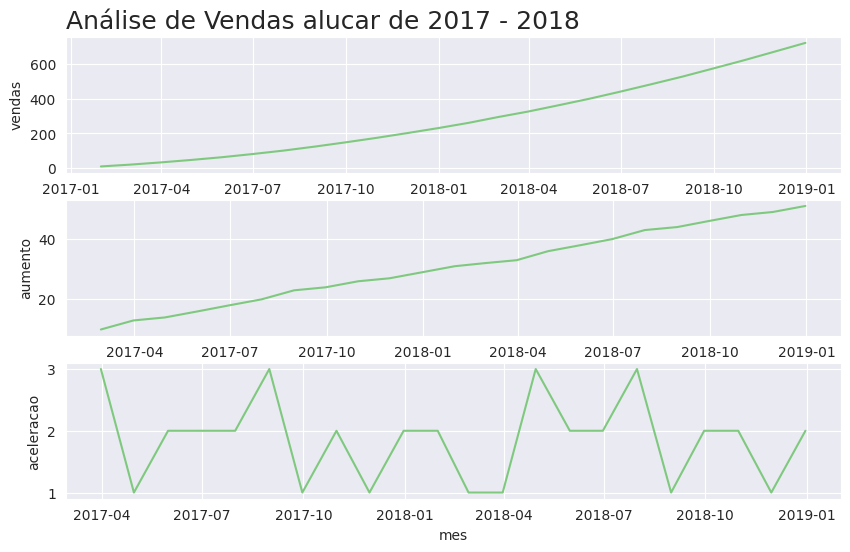

In [15]:
plt.figure(figsize=(10,6))
ax = plt.subplot(3, 1, 1)
ax.set_title(label= 'Análise de Vendas alucar de 2017 - 2018', fontsize = 18, loc = 'left')
sns.lineplot(x='mes', y='vendas', data = alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data = alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data = alucar)
ax = ax

In [16]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(12,8))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(label= titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x=x, y=y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x=x, y=y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x=x, y=y3, data = dataset)
  ax = ax

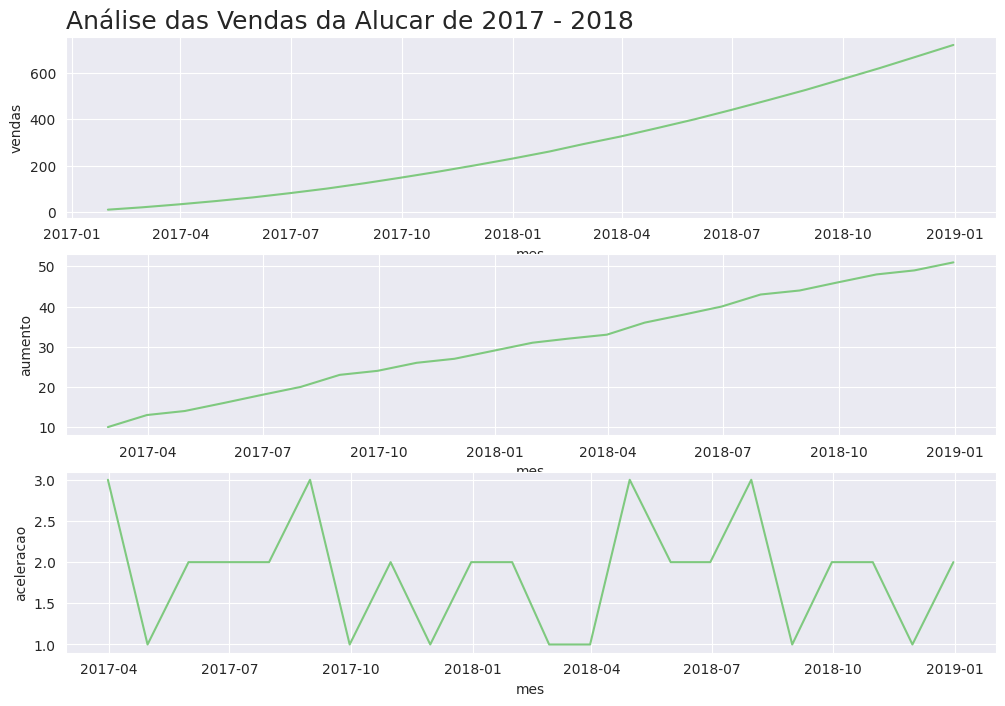

In [17]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das Vendas da Alucar de 2017 - 2018')

##Autocorrelação

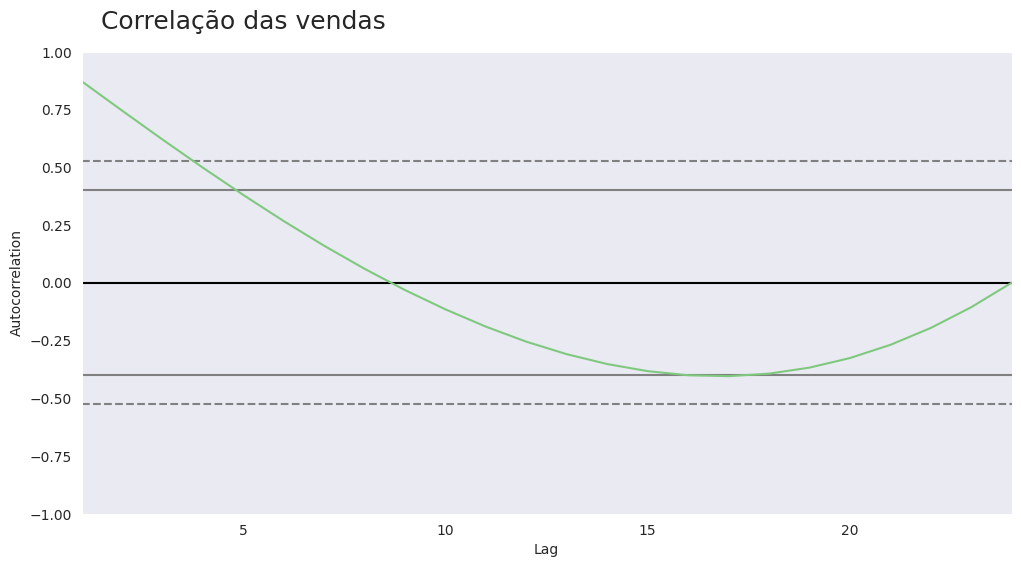

In [18]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['vendas'])
ax=ax

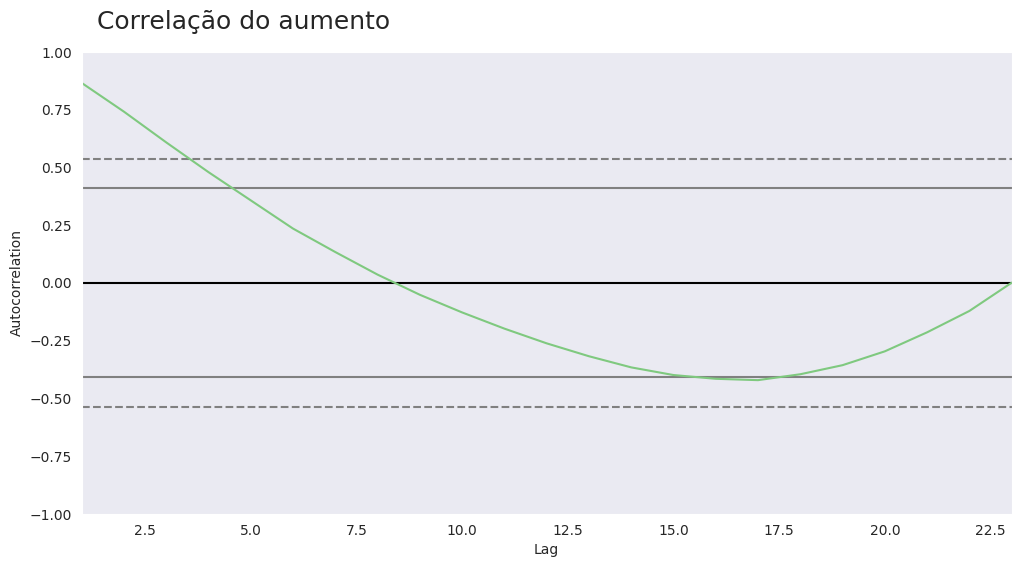

In [19]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['aumento'][1:])
ax=ax

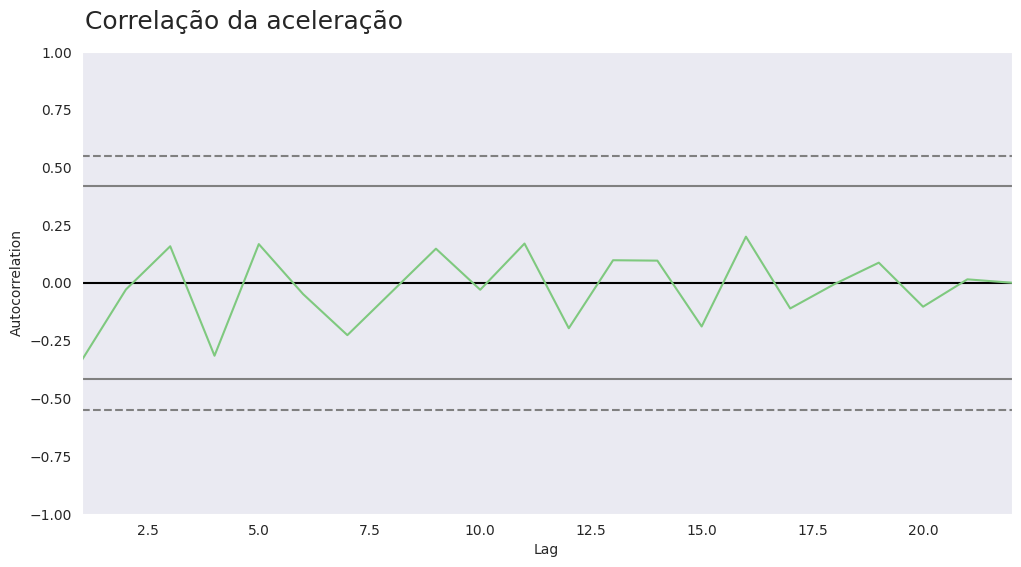

In [20]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

# Alucar - Analisando assinantes da Newsletter

In [21]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [22]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [23]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [24]:
assinantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   mes         24 non-null     datetime64[ns]
 1   assinantes  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [25]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [26]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


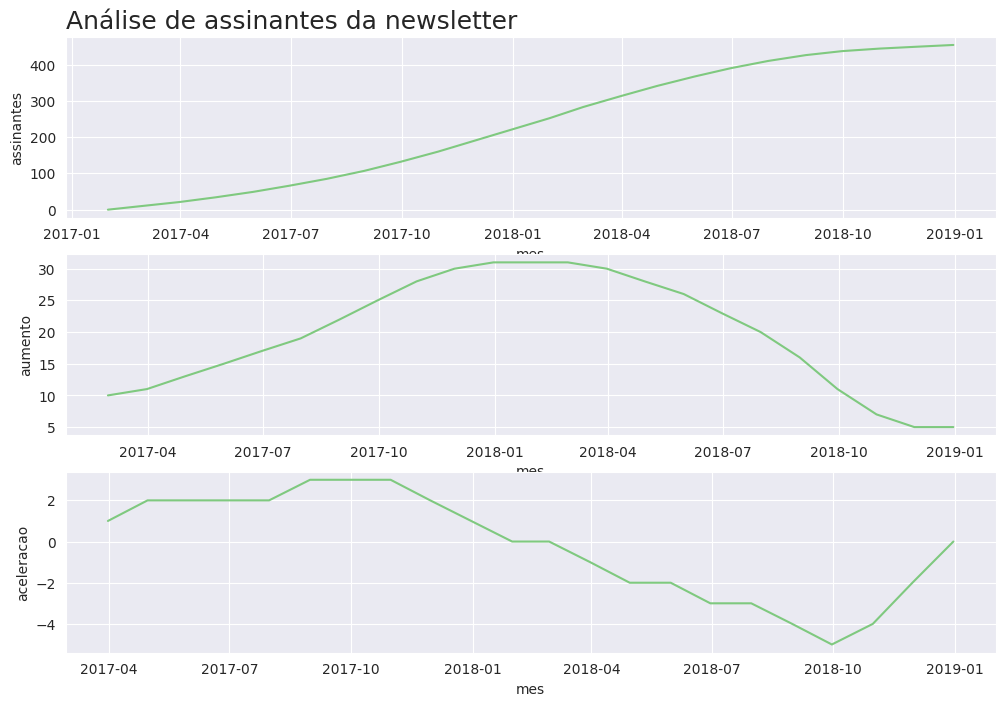

In [27]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Análise Chocolura

In [28]:
chocolura = pd.read_csv('chocolura.csv')

In [29]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [30]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [31]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [32]:
chocolura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


In [33]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

In [34]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


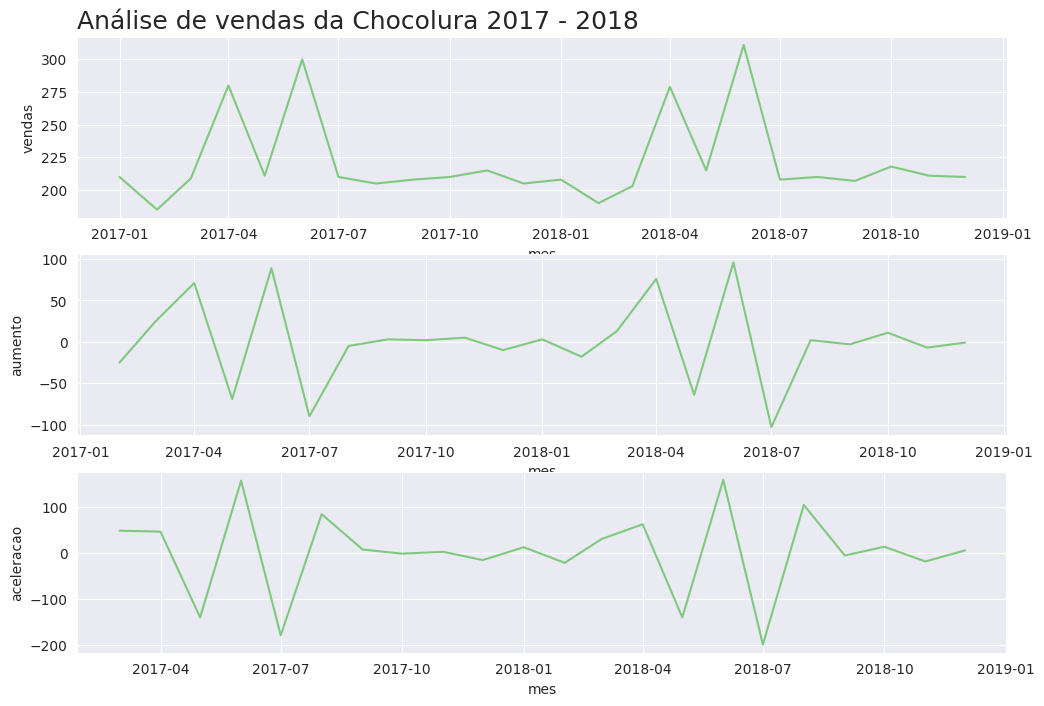

In [35]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura 2017 - 2018')

#Chocolura - Vendas diárias(Outubro e Novembro)

In [36]:
vendas = pd.read_csv('vendas_por_dia.csv')
vendas.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [37]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [38]:
vendas['dia'] = pd.to_datetime(vendas['dia'])

In [39]:
vendas.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [40]:
vendas['aumento'] = vendas['vendas'].diff()
vendas['aceleracao'] = vendas['aumento'].diff()

In [41]:
vendas.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


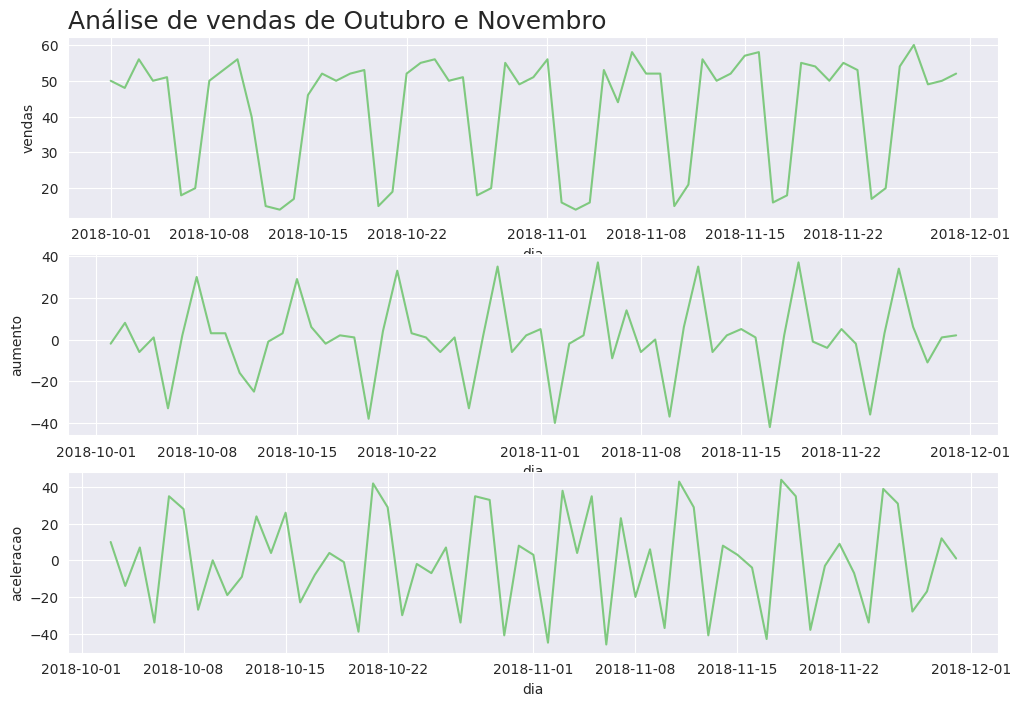

In [42]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas, 'Análise de vendas de Outubro e Novembro')

**Analisando a sazonalide**

In [43]:
vendas['dia_da_semana'] = vendas['dia'].dt.weekday

In [44]:
dia_traduzido = {'0': 'Segunda', '1':'Terça', '2':'Quarta', 
                 '3':'Quinta', '4':'Sexta', '5':'Sábado','6':'Domingo'}

In [45]:
vendas['dia_da_semana'] = vendas['dia_da_semana'].map(dia_traduzido)

In [46]:
vendas_agrupadas = vendas.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

<ipython-input-46-40eef5146cf3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


**Correlação das vendas diárias**


In [47]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')

In [48]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

In [49]:
vendas_por_dia

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0
...,...,...,...,...
56,2018-11-26,54,34.0,31.0
57,2018-11-27,60,6.0,-28.0
58,2018-11-28,49,-11.0,-17.0
59,2018-11-29,50,1.0,12.0


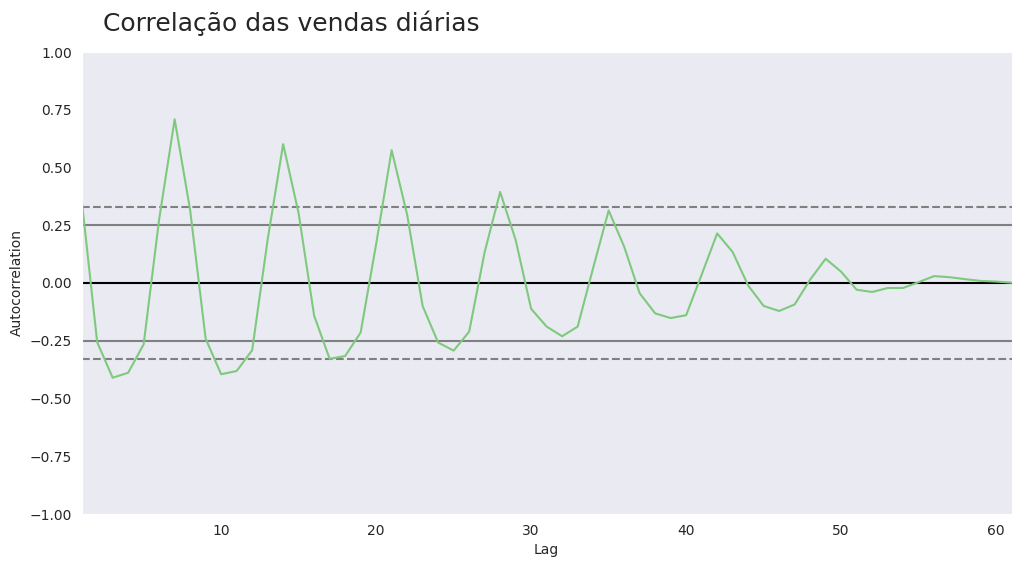

In [50]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

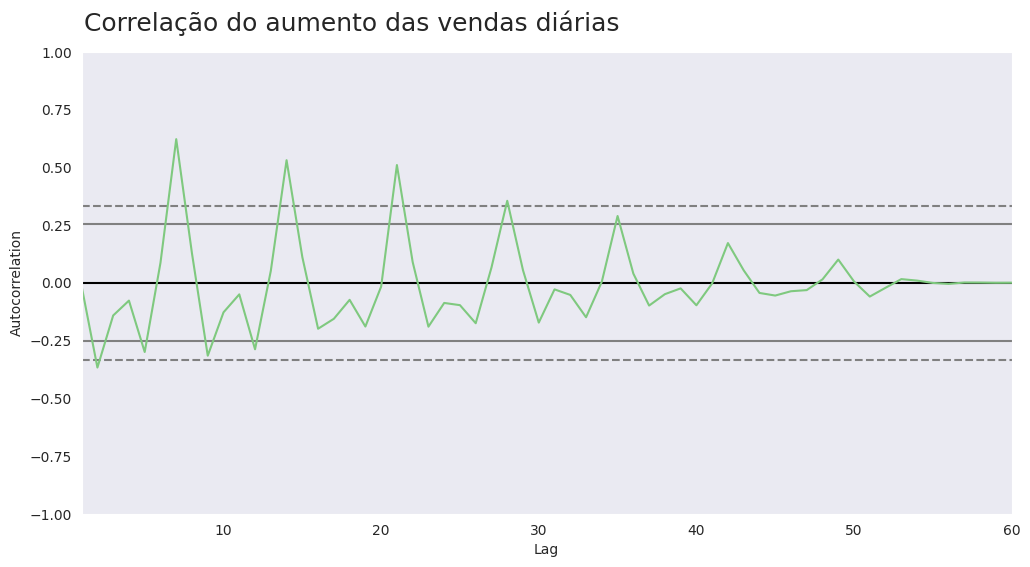

In [51]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

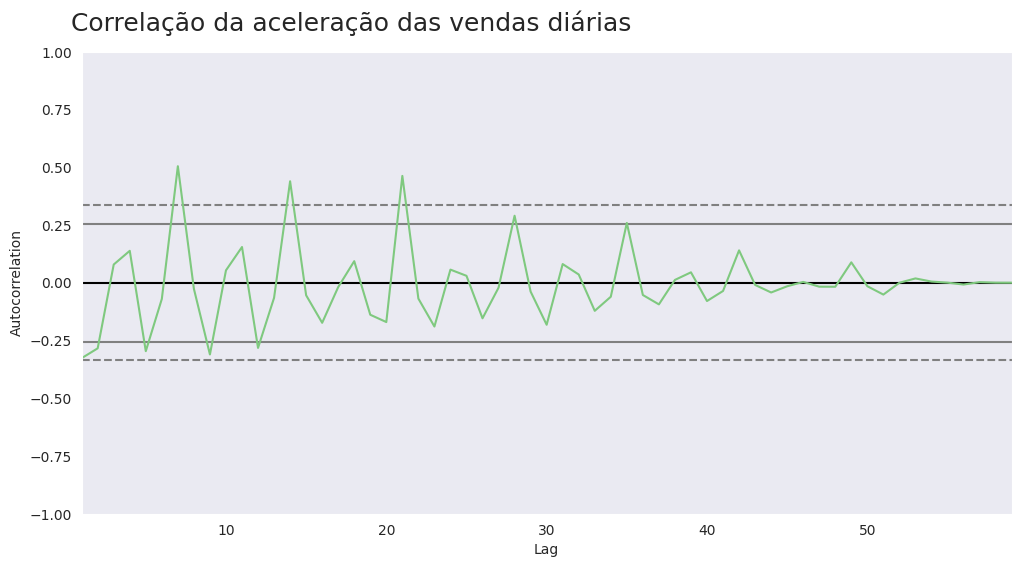

In [52]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

# Cafelura - Análise de Vendas

In [53]:
cafelura = pd.read_csv('cafelura.csv')

In [54]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [55]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [56]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [58]:
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     24 non-null     datetime64[ns]
 1   vendas  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


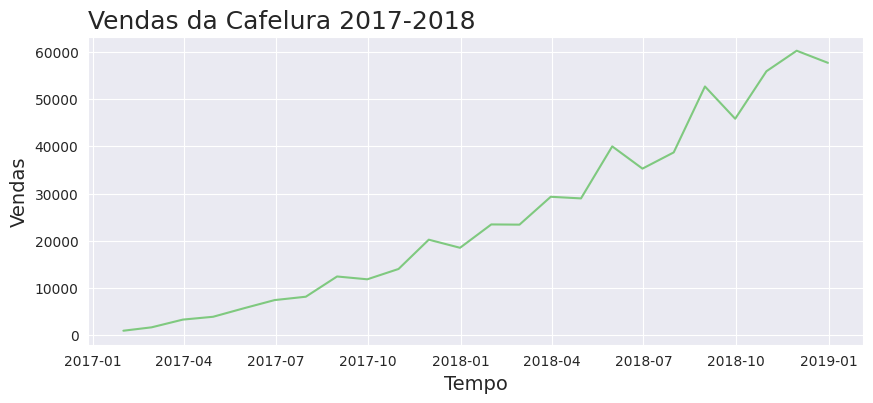

In [59]:
plotar('Vendas da Cafelura 2017-2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [60]:
qtd_fds = pd.read_csv('dias_final_de_semana.csv')

In [62]:
qtd_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [63]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / qtd_fds['quantidade_de_dias'].values

In [64]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


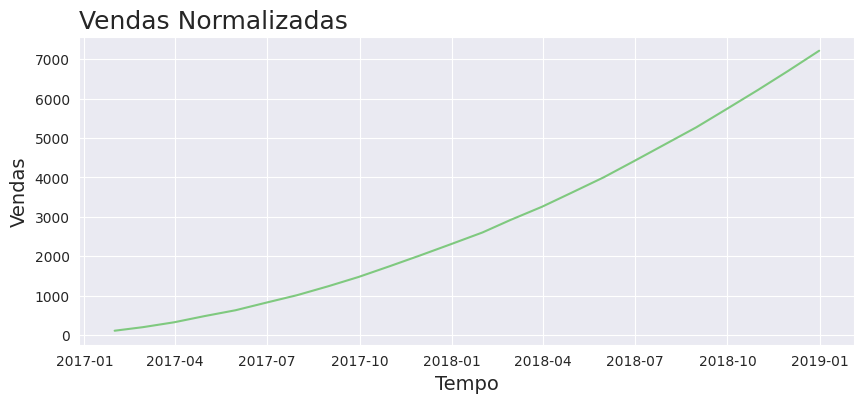

In [65]:
plotar('Vendas Normalizadas', 'Tempo', 'Vendas', 'mes', 'vendas_normalizadas', cafelura)

<Axes: title={'center': 'Vendas Normalizadas Cafelura 2017-2018'}, xlabel='mes', ylabel='vendas_normalizadas'>

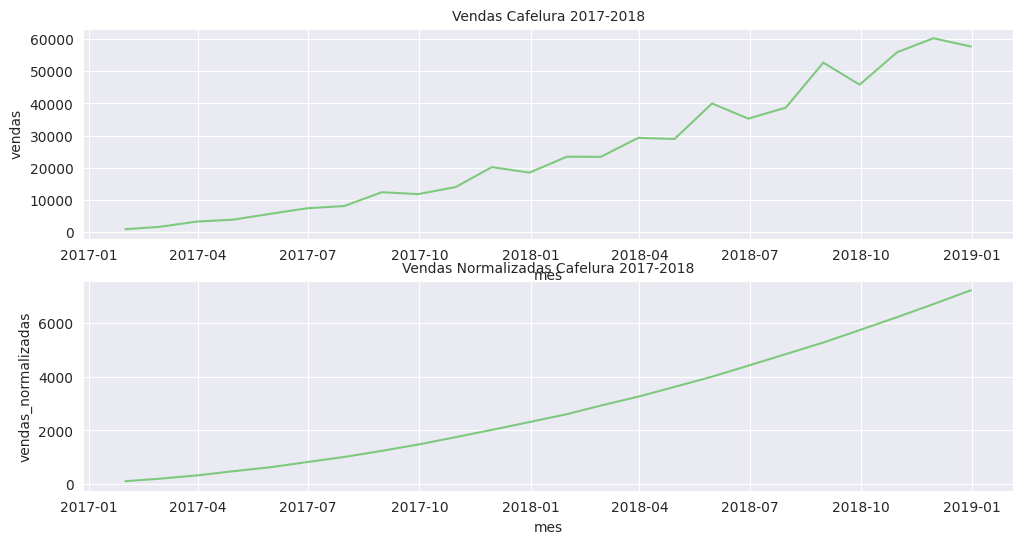

In [68]:
plt.figure(figsize=(12,6))
ax = plt.subplot(2, 1, 1) #plotando o primeiro gráfico que estará na primeira posição e ocupará todo o espaço
ax.set_title('Vendas Cafelura 2017-2018', fontsize=10)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2, 1, 2) #plotando o segundo gráfico que estará na segunda posição e ocupará todo o espaço
ax.set_title('Vendas Normalizadas Cafelura 2017-2018', fontsize=10)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)

# Statsmodels

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose #função que te mostra a decomposição em tendência, sazonalidade e resíduos

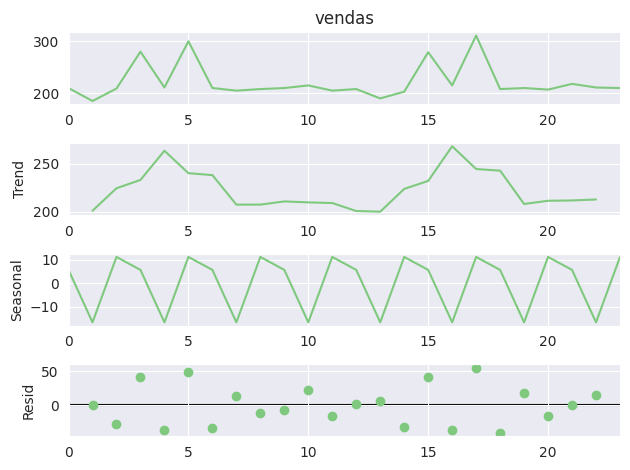

In [83]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()
plt.show()

In [84]:
obs = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [85]:
data = ({
    'observacao' : obs,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido
})

resultado = pd.DataFrame(data)

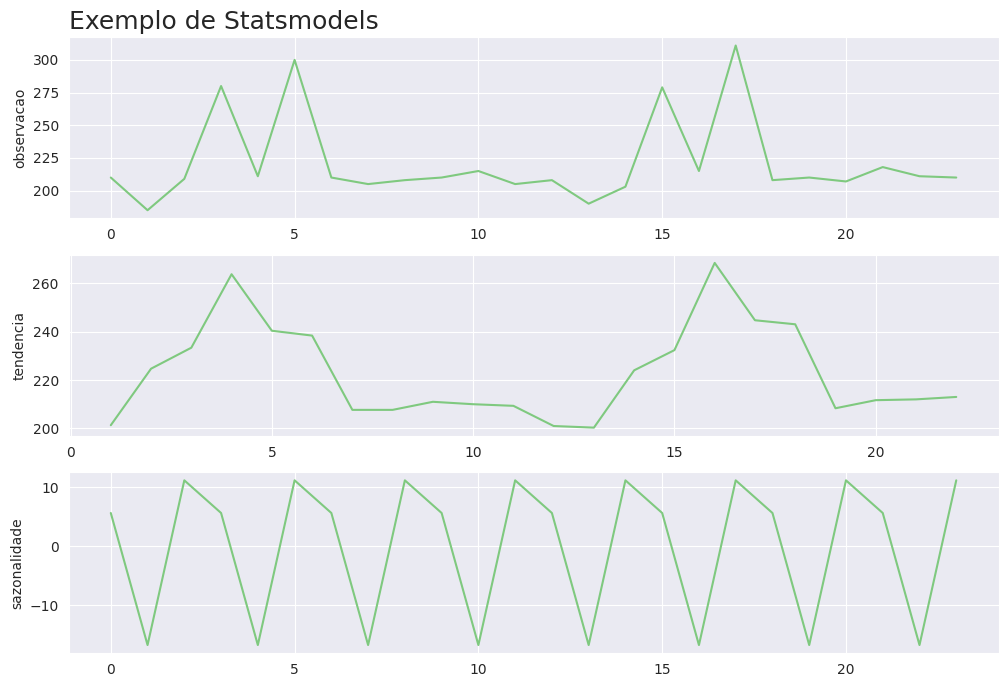

In [88]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

#Alucel - Análise de vendas

In [89]:
alucel = pd.read_csv('alucel.csv')

In [90]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [91]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [92]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [93]:
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [94]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

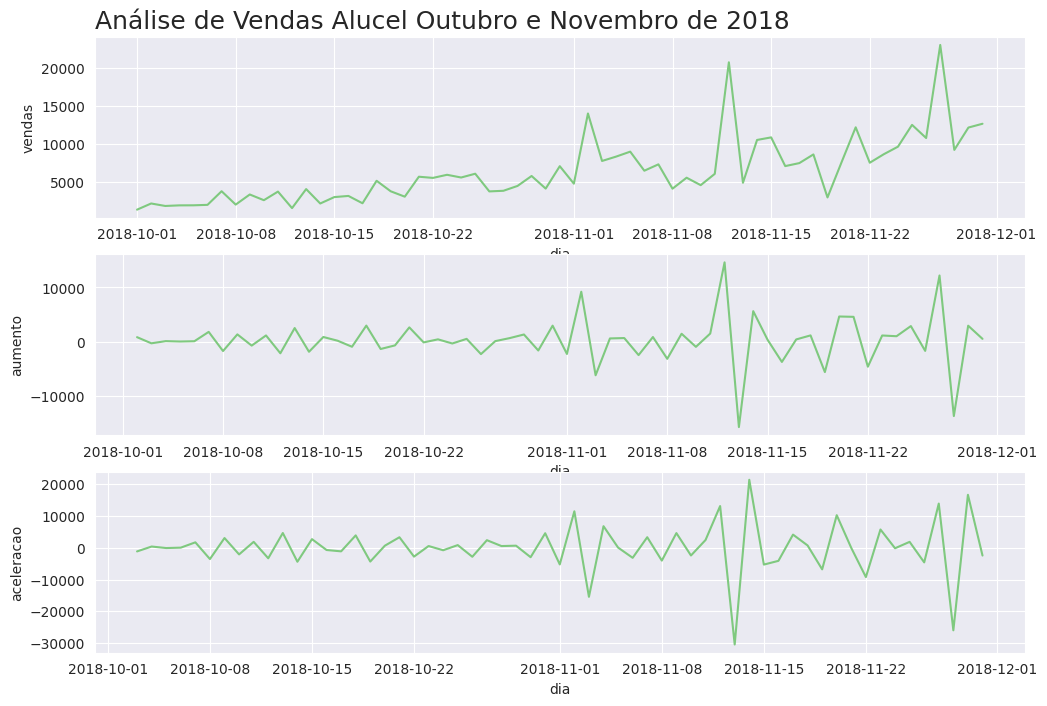

In [96]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de Vendas Alucel Outubro e Novembro de 2018')

**Média móvel - minimizar ruídos e dispersão da frequência**

Se fizermos um rolling muito extenso, perdemos informação e podemos ter uma análise equivocada.

A média móvel de 21 dias normalizou de forma satisfatória.

In [106]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean() #cria a média móvel a cada 7 dias

In [107]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN


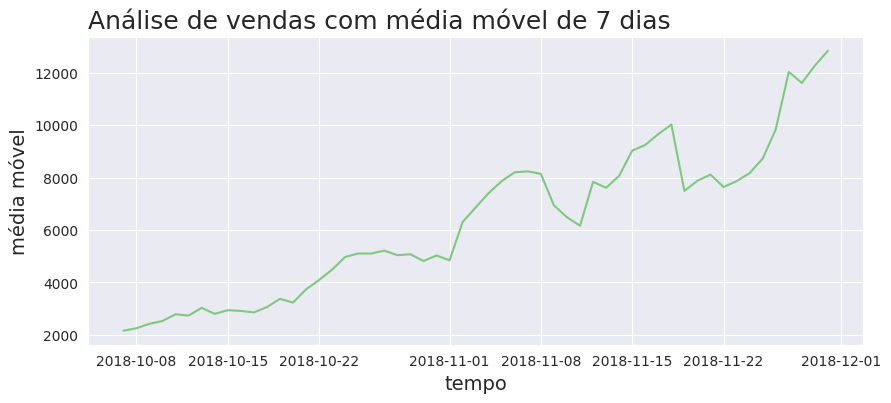

In [100]:
plotar('Análise de vendas com média móvel de 7 dias', 'tempo', 'média móvel', 'dia', 'media_movel', alucel)

In [102]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

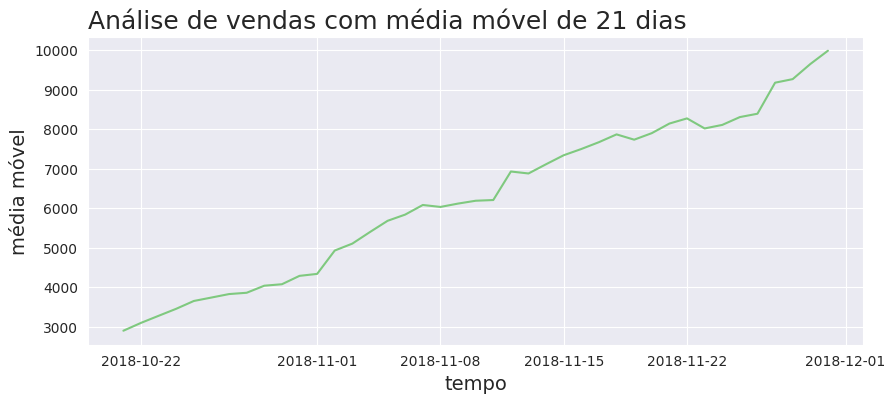

In [103]:
plotar('Análise de vendas com média móvel de 21 dias', 'tempo', 'média móvel', 'dia', 'media_movel_21', alucel)

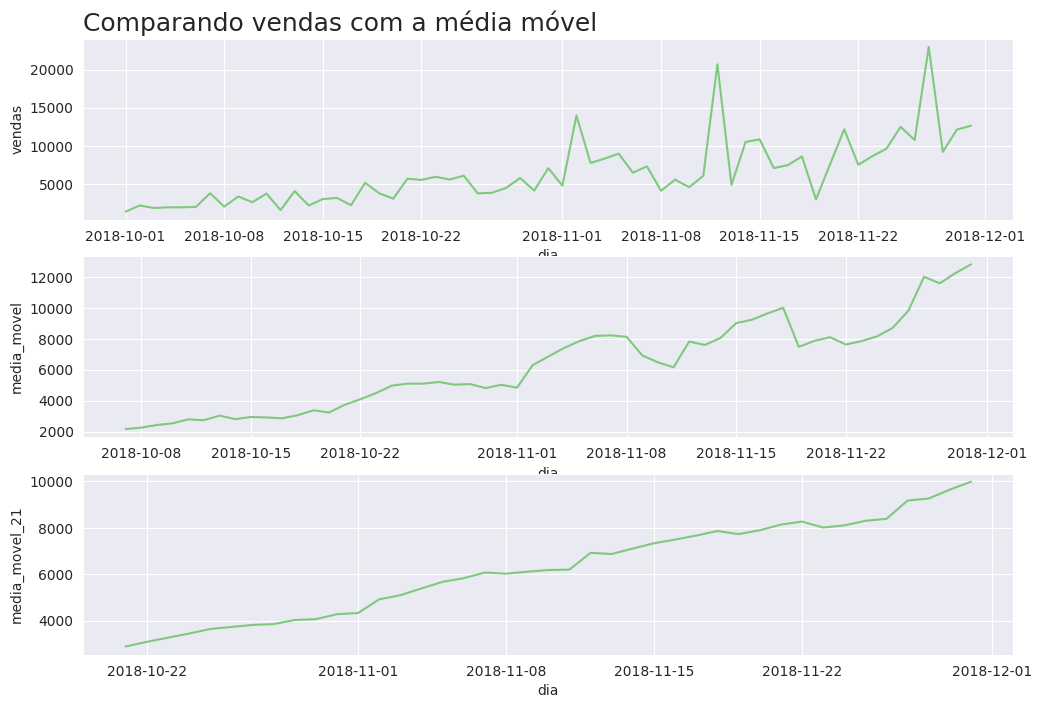

In [108]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando vendas com a média móvel')